In [2]:
from collections import defaultdict

import h5py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

from himalaya.scoring import correlation_score, correlation_score_split

from util import plot, subject
from util.path import Path
# from util.atlas import Atlas, get_brainmask
from constants import CONVS_STRANGERS, SUBS_STRANGERS, RUNS, RUN_TRIAL_SLICE, BLU, ORG

import warnings

warnings.filterwarnings("ignore")

In [1]:
%cd ..

/scratch/gpfs/zzada/fconv


In [3]:
# not all subjects have this..
SUBS_NAR = list(SUBS_STRANGERS)
SUBS_NAR.remove(11)
SUBS_NAR.remove(111)
SUBS_NAR.remove(12)

In [50]:
modelname = 'model-llama2-7b_layer-23'
modelname = 'model-opt-7b_layer-23'
modelname = 'model-syntactic_layer-23'

In [51]:
# load black results

respath = Path(
    root="encoding/black",
    sub="000",
    datatype=modelname,
    ext=".hdf5",
)

black_results = defaultdict(list)
for sub in tqdm(SUBS_NAR):
    respath.update(sub=f"{sub:03d}")
    with h5py.File(respath, "r") as f:
        black_results["cv_scores"].append(f["cv_scores"][:, :, :])

black_scores = np.stack(black_results["cv_scores"])
black_scores.shape

100%|██████████| 55/55 [00:00<00:00, 67.64it/s]


(55, 2, 2, 81924)

In [52]:
black_sub_scores = black_scores.mean(1)
black_feat_scores = black_sub_scores.mean(0)
black_feat_scores.shape

(2, 81924)

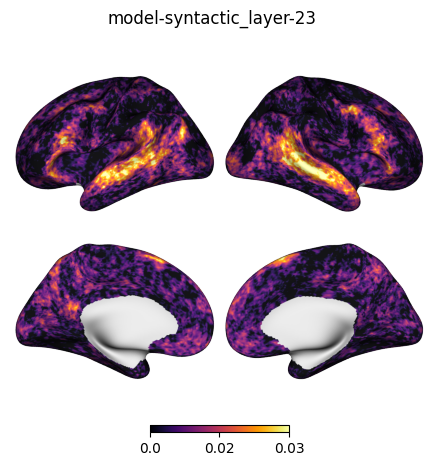

In [53]:
plot.surface_plot(black_feat_scores[-1], vmin=0, cmap='inferno', title=modelname);

In [46]:
respath = respath.update(sub='000')
with h5py.File(respath, "r") as f:
    group_result = f["cv_scores"][:, :, :].mean(0)

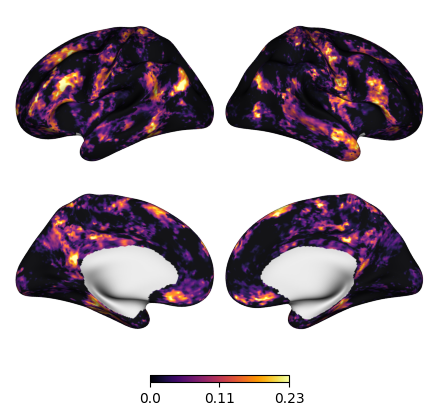

In [49]:
plot.surface_plot(group_result[1], vmin=0, cmap='inferno');